## Data literacy exercise 03

Machine Learning in Science, University of Tübingen, Winter Semester 2022



## Theoretical Part


### 1. EXAMple Question — The importance of Importance Sampling

(a) 
$P(S|\neg A) = \frac{5}{(5 + 29)} \approx 0.147$

$P(\neg S| A) = \frac{10}{(10 + 56)} \approx 0.152$

What is the variance of the estimators?

Lets try to compute the sample variance for $P(S| \neg A)$ with the formula from lecture 3, slide 27 (bottom).

$Var(\hat{\phi}) = \frac{1}{100}\phi(1 - \phi) = 0.009$

Continuing with $P(\neg S| A)$

$Var(\hat{\phi}) = \frac{1}{100}\phi(1 - \phi) = 0.018$


(b) In inportance sampling we can assign weights to individual samples to simulate a different distribution. In our sampling estimator, out of 100 students, 66 attended and 34 didnt.

As we would like to infer knowledge about students passing from another distribution (50% attend in general), we have to weight the samples which are underrespresented more heavily, in order to approximate the wanted distribution.

In order to archive this, let us weigh each sample of student which didn't attend twice. The new sampling estimator becomes:

|                | Attend | Skip |
|----------------|--------|------|
| Sufficient     | 56     | 10   |
| Not sufficient | 10     | 58   |

$P(S) = P(S | \neg A)P(\neg A) + P(S|A)P(A) = \frac{10}{58 + 10} \cdot 0.5 + \frac{56}{56 + 10} \cdot 0.5 \approx 0.501 $ 

(c) When using importance sampling, one has to be careful with scaling up the importance of the samples with low representation in the data, as it increases the variance of th e estimator.


### 2. Theory Question — Unbiased variance estimate

(a) Show that $\mathbb E[\hat{\mu}x_i] = \frac{1}{N}\sum_{j = 1}^N \mathbb E[x_j x_i].$

$\begin{align*}
\mathbb E[\hat{\mu}x_i] &= \mathbb E[\frac{1}{N}\sum_{j = 1}^N x_jx_i]\\
&=\frac{1}{N}\sum_{j = 1}^N \mathbb E[x_jx_i]
\end{align*}$

(b) Show that $\mathbb E[\hat{\mu}^2] = \frac{1}{N^2}\sum_{i = 1}^N\left(\sum_{j = 1}^N \mathbb E[x_j x_i]\right).$

$\begin{align*}
\mathbb E[\hat{\mu}^2] &= \mathbb E[\left(\frac{1}{N}\sum_{j = 1}^N x_j\right)\left(\frac{1}{N}\sum_{j = 1}^N x_j\right)]\\
&= \left(\frac{1}{N}\sum_{j = 1}^N \mathbb E[x_j]\right)\left(\frac{1}{N}\sum_{j = 1}^N \mathbb E[x_j]\right)\\
&= \frac{1}{N^2}\sum_{j = 1}^N \sum_{i = 1}^N \mathbb E[x_j] \mathbb E[x_i]\\
&= \frac{1}{N^2}\sum_{i = 1}^N\left(\sum_{j = 1}^N \mathbb E[x_j x_i]\right).
\end{align*}$

(c) Using 2(a) and 2(b), show that $\tilde{\sigma}^2$ is biased, where $\tilde{\sigma}^2 = \sigma^2 \frac{N-1}{N}$ and derive the unbiased estimate.

$\begin{align*}
\tilde{\sigma}^2 &= \sigma^2 \frac{N-1}{N}\\
&= \left(\mathbb E[X^2] - \mathbb E[X]^2\right)\frac{N-1}{N}\\
&= 
\end{align*}$

### Introduction

In this notebook, you will use the Sampling (Monte-Carlo) estimator to compute the position of the E. coli bacterium, which in the absence of food odors wanders around randomly to seek a food source, performing a so-called "random walk". 

Let's assume that at each time-step $t$, it "flips a coin" (a very small, microscopic coin of protein mintage), then heads left $X_t=-1$ or right $X_t=+1$ with equal probability. Thus, the position $Y_T$ at time-step $t=T$ is computed as $ Y_T = \sum \limits_{t=1}^{T} X_t$


### 1. Random walk simulation

Fill in the code below to simulate $N$ random walks of $T$ time-steps



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def random_walk_simulator(N, T):
    '''Simulate N random walks for T time-steps. At each time point, the step (left or right)
      is drawn from a Bernoulli distribution

    Args:
    N (integer) : Number of simulations
    T (integer) : Duration of random walk in time-steps

    Returns:
    (numpy array) : NxT array in which each row corresponds to a simulation
    '''
    sims = np.zeros((N, T))
    
    for n in range(N):
        
        current = 0
        
        for t in range(T):
            current += np.random.randint(2)* 2 - 1
            
            sims[n, t] = current
           

    return sims

Simulate $ N = 10000 $ random walks for $ T = 1000 $ time-steps and plot the first $ 10 $ simulations 

In [9]:
def plot_random_walk_sims(sims, num=10):
  plt.figure()
  t = np.arange(sims.shape[1])
  plt.step(t, sims[:num, :].T)
  plt.xlabel('time-steps')
  plt.ylabel('position $Y_T$')
  plt.show()

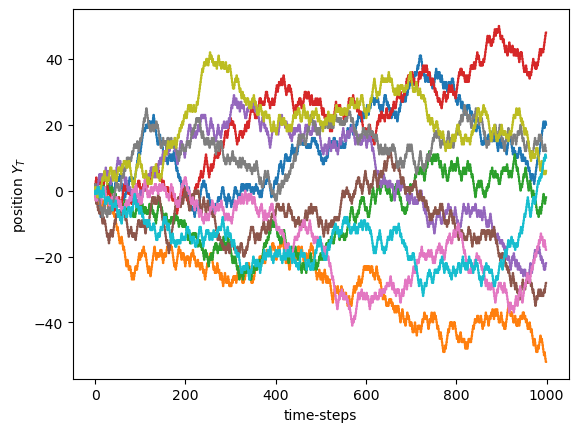

In [10]:
np.random.seed(42)  # set random seed
N = 10000           # set number of simulations
T = 1000            # set number of time-steps

# simulate random walks
sims = random_walk_simulator(N, T)

# plot first 10 simulations
plot_random_walk_sims(sims, num=10)

### 2. Distribution of $ Y_T$

Plot the histogram of the position $ Y_T $ of the bacterium for $ T = 1000 $. What is the underlying distribution? Justify your answer.

(array([1.170000e+02, 6.010000e+02, 2.182000e+03, 8.706000e+03,
        2.840800e+04, 8.602600e+04, 2.183910e+05, 4.876300e+05,
        1.130814e+06, 1.965533e+06, 2.679962e+06, 1.820097e+06,
        8.696110e+05, 4.155900e+05, 1.894180e+05, 6.648700e+04,
        2.146400e+04, 6.821000e+03, 1.917000e+03, 2.250000e+02]),
 array([-128.  , -115.65, -103.3 ,  -90.95,  -78.6 ,  -66.25,  -53.9 ,
         -41.55,  -29.2 ,  -16.85,   -4.5 ,    7.85,   20.2 ,   32.55,
          44.9 ,   57.25,   69.6 ,   81.95,   94.3 ,  106.65,  119.  ]),
 <BarContainer object of 20 artists>)

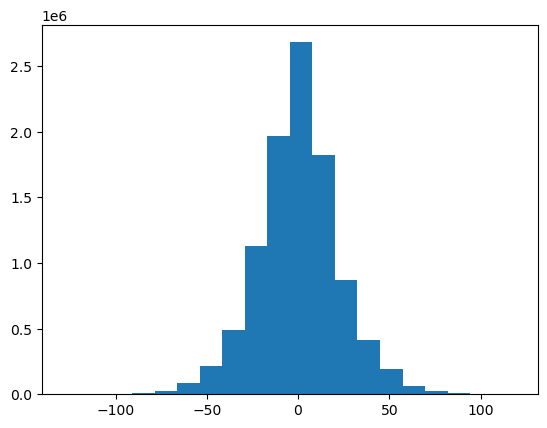

In [11]:
n_bins = 20
# plot histogram
# TODO: your code here
plt.hist(sims.reshape(-1,), bins=n_bins)

### 3. Sample average and unbiased Sample variance

Calculate the sample average and the unbiased sample variance (as we saw in the Theory Question) of the position at time-step $ T=1000 $ using the simulations computed above

In [14]:
# Compute sample average
sample_average = np.sum(sims[:,T-1]) / N

# Compute unbiased sample variance
sample_variance = np.sum(np.array([(sample_average - v)**2 for v in sims[:,T-1]])) / N

print(f'Sample average = {sample_average}\n Unbiased Sample variance = {sample_variance}')


Sample average = 0.0872
 Unbiased Sample variance = 977.85399616


Plot the sample average and the unbiased sample variance of $ Y_T=1000 $ as a function of the number of random walks $ N, 1 \lt N \leq 10000 $. 
What can you observe as $ N $ increases?  

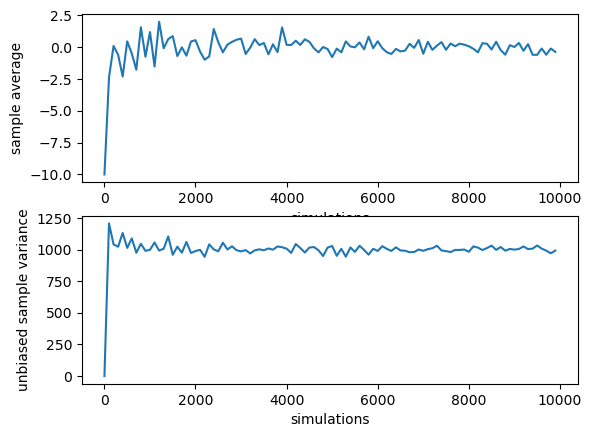

In [27]:

fig, (ax1, ax2) = plt.subplots(2)

# TODO: your code here
avgs = []
vars = []

start = 1
fin = 10000
step = 100

for n in range(start, fin, step):
    
    n_sims = np.array([np.sum(np.random.randint(2, size=T) * 2 - 1) for _ in range(n)])
    
    # Compute sample average
    sample_average = np.sum(n_sims) / n

    # Compute unbiased sample variance
    sample_variance = np.sum(np.array([(sample_average - v)**2 for v in n_sims])) / n
    
    avgs.append(sample_average)
    vars.append(sample_variance)
    
ax1.plot(range(start, fin, step), avgs)
ax2.plot(range(start, fin, step), vars)

ax1.set(ylabel='sample average')
ax1.set(xlabel='simulations')
ax2.set(ylabel='unbiased sample variance')
ax2.set(xlabel='simulations')

plt.show()



### 4. Analytical computation of $E[Y_T]$ and $Var(Y_T)$ 

Analytically compute the expectation $E[Y_T]$ and variance $Var(Y_T)$ of the position of the bacterium, after $T$ time-steps, and compare with the plot in the previous question. You can write your derivations in the pdf file of the theoretical questions or you can edit the markdown cell below. 

$Y_T$ can be interpreted as a series of individual experiments $Y_1 + Y_2 + ... + Y_t$

Assume that the expectation $\mathbb E[Y_t]$ for the outcome of a single experiment $Y_t$ is 0.
Assume that the variance $Var(Y_t)$ for a single event is 1, since $Var(Y_t) = \frac{1}{2} \left( (1 - 0)^2 + (-1 - 0)^2\right) = 1$

(1) $\mathbb E[Y_T] = \mathbb E[\sum_t^T  Y_t] = \sum_t^T \mathbb E[Y_t] = \sum_t^T 0 = 0$ 

(2) $V(Y_T) = V(Y_1) + ... + V(Y_t) = T \cdot 1 = T$


$E[Y_T=1000] \overset{\mathrm{(1)}}{=} 0$

$Var(Y_T=1000) \overset{\mathrm{(2)}}{=} 1000$

Plot values seem to converge to analytical results.


### 5. Sample average and unbiased Sample variance, as a function of time-steps $ T $
Plot the sample average and the unbiased sample variance as a function of time, for the previously simulated $N = 10000$ random walks, and compare with your solutions of the previous question.

In [ ]:

fig, (ax1, ax2) = plt.subplots(2)

# TODO: your code here

ax1.set(ylabel='sample average')
ax1.set(xlabel='time')
ax2.set(ylabel='unbiased sample variance')
ax2.set(xlabel='time')

plt.show()

### 6. Expected time to find food
Assume that if the bacterium crosses the boundary $ [-10, 10] $ it reaches a food source. What is the expected number of time-steps it needs to achieve that?

In [ ]:
# TODO: your code here

expected_time = ... # TODO: your code here
print(f'Expected time-steps needed = {expected_time}')